//=========================================================================

# ATIVIDADE FIAP - Cap 3 - Implementando algoritmos de Machine Learning com Scikit-learn
//=========================================================================

// Autor.....: Diego Nunes Veiga

// RM........: 560658

// Turma.....: Graduação - 1TIAOR

// Data......: 11/11/2024

//==========================================================================

In [158]:
# Importação das bibliotecas
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

# TRATAMENTO E CONVERSÃO DO ARQUIVO TXT PARA CSV

In [159]:
# Leitura dos arquivo
arq = open('seeds_dataset.txt', 'r')

# Apresentação dos dados
print(arq.read())

# fechamento do arquivo
arq.close()

15.26	14.84	0.871	5.763	3.312	2.221	5.22	1
14.88	14.57	0.8811	5.554	3.333	1.018	4.956	1
14.29	14.09	0.905	5.291	3.337	2.699	4.825	1
13.84	13.94	0.8955	5.324	3.379	2.259	4.805	1
16.14	14.99	0.9034	5.658	3.562	1.355	5.175	1
14.38	14.21	0.8951	5.386	3.312	2.462	4.956	1
14.69	14.49	0.8799	5.563	3.259	3.586	5.219	1
14.11	14.1	0.8911	5.42	3.302	2.7		5		1
16.63	15.46	0.8747	6.053	3.465	2.04	5.877	1
16.44	15.25	0.888	5.884	3.505	1.969	5.533	1
15.26	14.85	0.8696	5.714	3.242	4.543	5.314	1
14.03	14.16	0.8796	5.438	3.201	1.717	5.001	1
13.89	14.02	0.888	5.439	3.199	3.986	4.738	1
13.78	14.06	0.8759	5.479	3.156	3.136	4.872	1
13.74	14.05	0.8744	5.482	3.114	2.932	4.825	1
14.59	14.28	0.8993	5.351	3.333	4.185	4.781	1
13.99	13.83	0.9183	5.119	3.383	5.234	4.781	1
15.69	14.75	0.9058	5.527	3.514	1.599	5.046	1
14.7	14.21	0.9153	5.205	3.466	1.767	4.649	1
12.72	13.57	0.8686	5.226	3.049	4.102	4.914	1
14.16	14.4	0.8584	5.658	3.129	3.072	5.176	1
14.11	14.26	0.8722	5.52	3.168	2.688	5.219	1
15.88	14.9	0.8988	5.618	3

In [160]:
# Conta as linhas com múltiplas tabulações consecutivas
count = 0
with open("seeds_dataset.txt", "r") as file:
    for i, line in enumerate(file, start=1):
        if "\t\t" in line:
            count += 1

print(f"Número de linhas com múltiplas tabulações: {count}")


Número de linhas com múltiplas tabulações: 11


In [161]:
# Predefinição dos arquivo: bruto e tratado
arquivo_bruto = "seeds_dataset.txt"
arquivo_tratado = "seeds_dataset_limpo.txt"

# Substituir múltiplas tabulações por uma única
with open(arquivo_bruto, "r") as file, open(arquivo_tratado, "w") as output:
    for linha in file:

        # Substitui múltiplas tabulações
        linha_OK = linha.replace("\t\t", "\t")

        # Garante que todas as ocorrências sejam tratadas
        while "\t\t" in linha_OK:
            linha_OK = linha_OK.replace("\t\t", "\t")
        output.write(linha_OK)

print(f"Arquivo limpo salvo em: {arquivo_tratado}")

Arquivo limpo salvo em: seeds_dataset_limpo.txt


In [162]:
# Predefinição dos arquivo csv
arquivo_csv = "seeds_dataset.csv"

# Ler o arquivo com separador \t
df = pd.read_csv(arquivo_tratado, sep="\t", header=None)

# Adicionando os nomes dos títulos das colunas
df.columns = ["Área", "Perímetro", "Compacidade", "Comprimento_núcleo", "Largura_núcleo", "Coeficiente_assimetria", "Comprimento_suco_núcleo", "Tipo_grão"]

# Salve o DataFrame em CSV
df.to_csv(arquivo_csv, index=False)

print(f"Arquivo convertido com sucesso: {arquivo_csv}")

Arquivo convertido com sucesso: seeds_dataset.csv


# INFORMAÇÕES DOS DADOS

In [163]:
# Leitura do arquivo csv
df = pd.read_csv('seeds_dataset.csv')

# Apresentação dos dados
df.head()

,Área,Perímetro,Compacidade,Comprimento_núcleo,Largura_núcleo,Coeficiente_assimetria,Comprimento_suco_núcleo,Tipo_grão
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [164]:
# Apresentação das informações gerais dos dados do arquivo
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Área                     210 non-null    float64
 1   Perímetro                210 non-null    float64
 2   Compacidade              210 non-null    float64
 3   Comprimento_núcleo       210 non-null    float64
 4   Largura_núcleo           210 non-null    float64
 5   Coeficiente_assimetria   210 non-null    float64
 6   Comprimento_suco_núcleo  210 non-null    float64
 7   Tipo_grão                210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


In [165]:
# Verificar a presença de dados duplicados

duplicates = df.duplicated().sum()
print("Número de dados duplicados:", duplicates)

Número de dados duplicados: 0


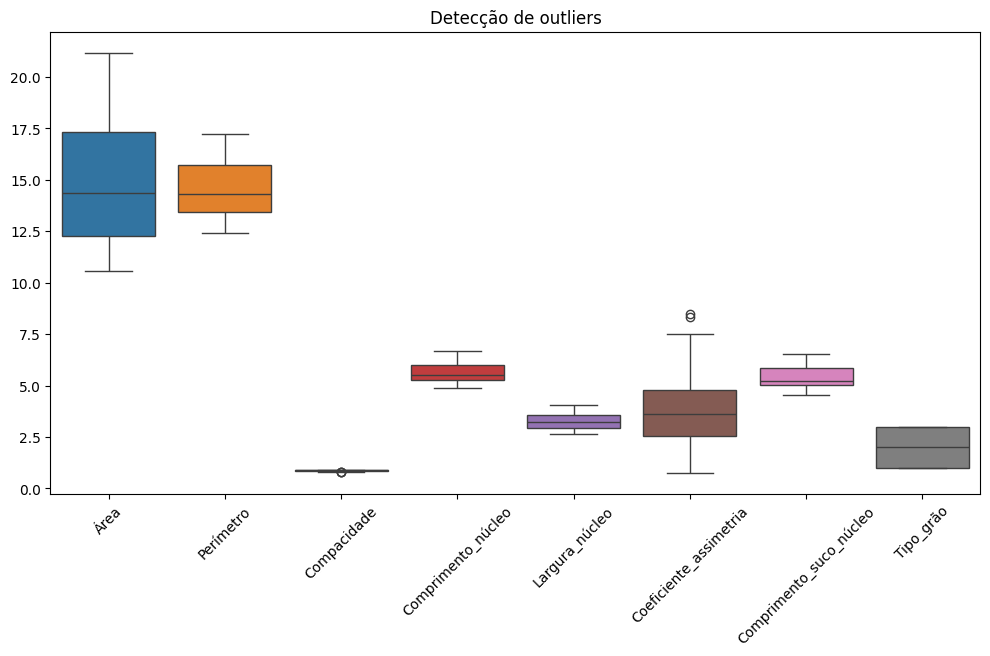

In [166]:
# Verificar a presença de outliers a partir da apresentação do Boxplot

plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.title("Detecção de outliers")
plt.xticks(rotation=45)
plt.show()

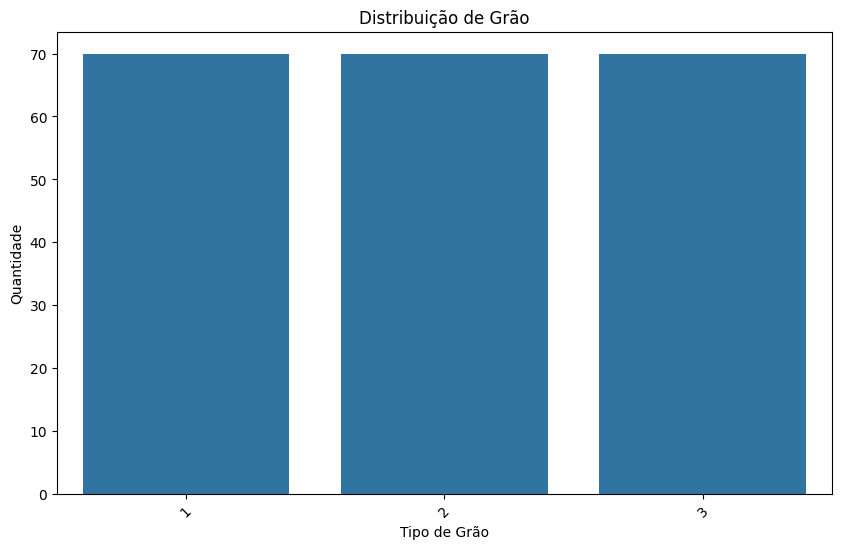

In [167]:
# Apresentação da distribuição dos labels

plt.figure(figsize=(10, 6))
sns.countplot(x='Tipo_grão', data=df)
plt.title("Distribuição de Grão")
plt.xlabel("Tipo de Grão")
plt.ylabel("Quantidade")
plt.xticks(rotation=45)
plt.show()

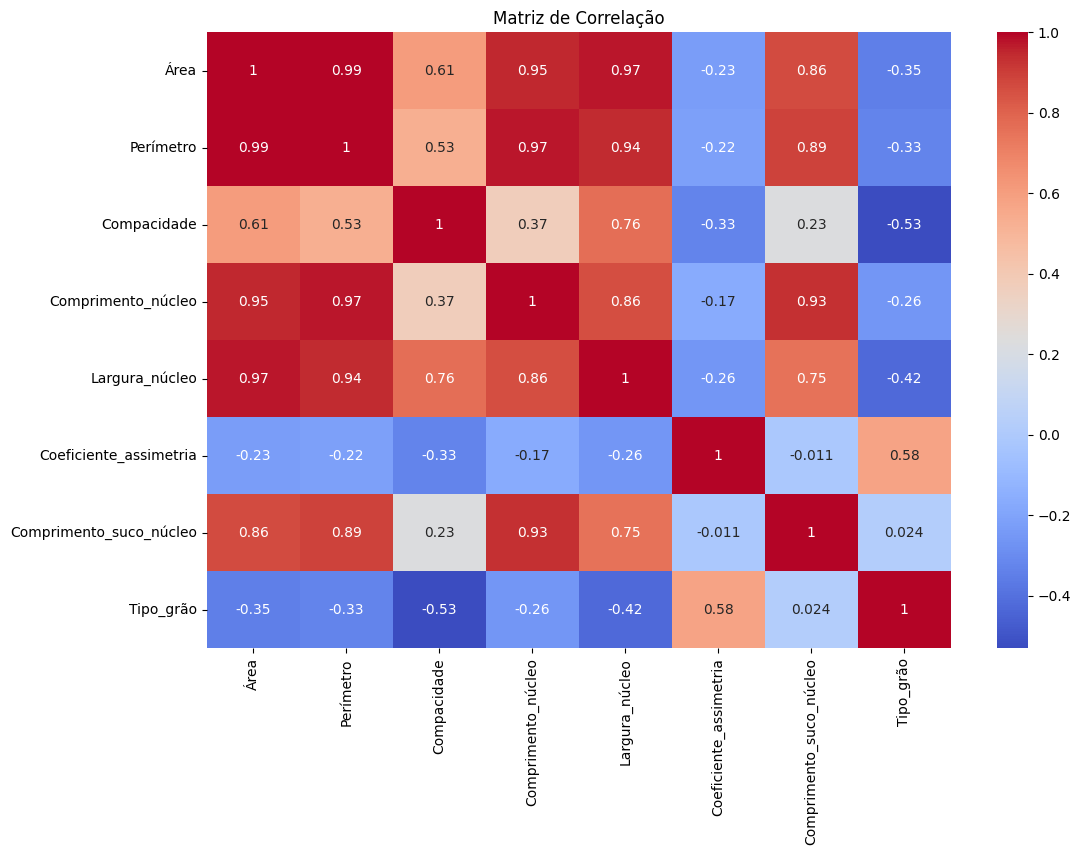

In [168]:
# Apresentação da matriz de correção

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include=numerics).corr(), annot=True, cmap='coolwarm')
plt.title("Matriz de Correlação")
plt.show()

# LIMPEZA DE DADOS

In [169]:
# Realiza o comando para retirar todos os outliers

outlier_counts = {}

for coluna in ["Área", "Perímetro", "Compacidade", "Comprimento_núcleo", "Largura_núcleo", "Coeficiente_assimetria", "Comprimento_suco_núcleo", "Tipo_grão"]:

    ExibeValor = True

    while True:

        # Calcular os limites do IQR
        Q1 = df[coluna].quantile(0.25)
        Q3 = df[coluna].quantile(0.75)
        IQR = Q3 - Q1
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR

        # Contar os outliers da coluna atual
        outliers = df[(df[coluna] < limite_inferior) | (df[coluna] > limite_superior)]
        num_outliers = len(outliers)

        # Coleta dados da qauntidade inicial de outliers
        if ExibeValor == True:
          outlier_counts[coluna] = len(outliers)
          ExibeValor = False

        # Verificar se ainda existem outliers
        if num_outliers == 0:
            break
        else:
            # Substituir os outliers pela mediana
            mediana = df[coluna].median()
            df[coluna] = df[coluna].apply(lambda x: mediana if x < limite_inferior or x > limite_superior else x)

# Exibir a quantidade de outliers para cada coluna
for coluna, count in outlier_counts.items():
    print(f"Coluna '{coluna}' possuia {count} outliers.")

# formatar o banco de dados
df.shape

Coluna 'Área' possuia 0 outliers.
Coluna 'Perímetro' possuia 0 outliers.
Coluna 'Compacidade' possuia 3 outliers.
Coluna 'Comprimento_núcleo' possuia 0 outliers.
Coluna 'Largura_núcleo' possuia 0 outliers.
Coluna 'Coeficiente_assimetria' possuia 2 outliers.
Coluna 'Comprimento_suco_núcleo' possuia 0 outliers.
Coluna 'Tipo_grão' possuia 0 outliers.


(210, 8)

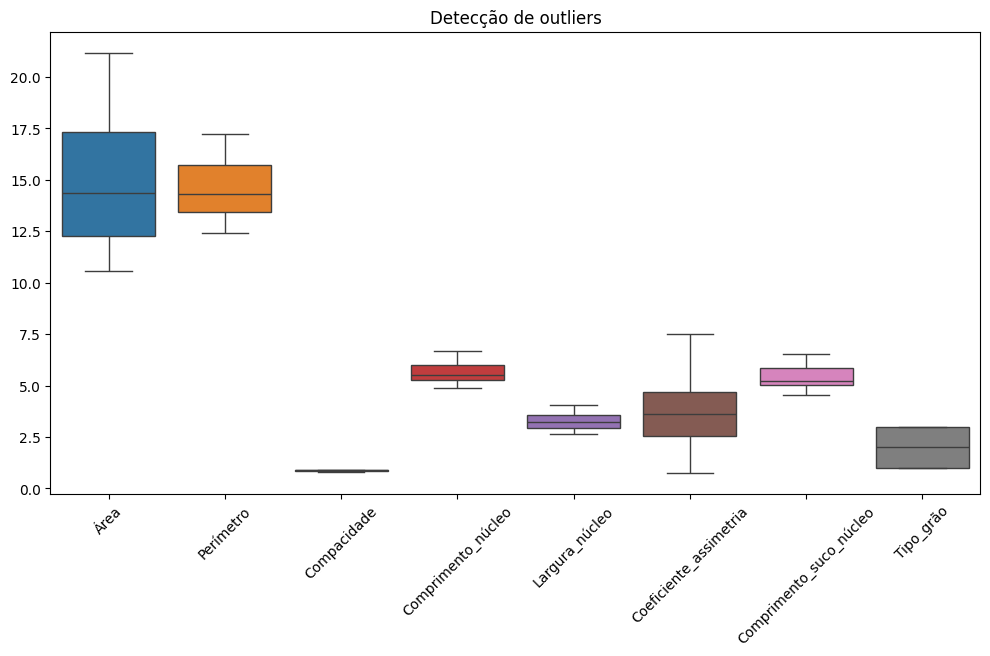

In [170]:
# Verificar a presença de outliers a partir da apresentação do Boxplot

plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.title("Detecção de outliers")
plt.xticks(rotation=45)
plt.show()

# DADOS PARA TREINAMENTO E APROVAÇÃO

In [171]:
# Separando features e labels
X_estat = df

In [172]:
# Calcular as estatísticas descritivas
estatisticas = pd.DataFrame({
    "Média": X_estat.mean(),
    "Mediana": X_estat.median(),
    "Desvio Padrão": X_estat.std()
    })

# Exibir as estatísticas
print("Estatísticas descritivas:")
print(estatisticas)

Estatísticas descritivas:
                             Média    Mediana  Desvio Padrão
Área                     14.847524  14.355000       2.909699
Perímetro                14.559286  14.320000       1.305959
Compacidade               0.872222   0.873487       0.021998
Comprimento_núcleo        5.628533   5.523500       0.443063
Largura_núcleo            3.258605   3.237000       0.377714
Coeficiente_assimetria    3.654615   3.598500       1.431286
Comprimento_suco_núcleo   5.408071   5.223000       0.491480
Tipo_grão                 2.000000   2.000000       0.818448


In [173]:
# Separando os valores para o eixo X
X = df.drop("Tipo_grão", axis=1)

# Separando os valores para o eixo Y
Y = df["Tipo_grão"]

In [174]:
# Aplicando MinMaxScaler
scaler_minmax = MinMaxScaler()
X_minmax_scaled = scaler_minmax.fit_transform(X)

# Salvando os nomes das colunas par exibição
colunas = ["Área", "Perímetro", "Compacidade", "Comprimento_núcleo", "Largura_núcleo", "Coeficiente_assimetria", "Comprimento_suco_núcleo"]

# Mostrando as primeiras linhas dos dados escalados
df_minmax = pd.DataFrame(X_minmax_scaled,  columns = colunas)
df_minmax.head()

,Área,Perímetro,Compacidade,Comprimento_núcleo,Largura_núcleo,Coeficiente_assimetria,Comprimento_suco_núcleo
0,0.440982,0.502066,0.534449,0.486486,0.486101,0.215405,0.345150
1,0.405099,0.446281,0.633858,0.368806,0.501069,0.037417,0.215165
2,0.349386,0.347107,0.869094,0.220721,0.503920,0.286126,0.150665
3,0.306893,0.316116,0.775591,0.239302,0.533856,0.221027,0.140817
4,0.524079,0.533058,0.853346,0.427365,0.664291,0.087278,0.322994


In [175]:
# Atualizando os valores para o eixo X após MinMaxScaler
X = df_minmax

In [176]:
# Novos calulos das estatísticas descritivas após MinMaxScaler
estatisticas = pd.DataFrame({
    "Média": X.mean(),
    "Mediana": X.median(),
    "Desvio Padrão": X.std()
    })

# Exibir as estatísticas
print("Estatísticas descritivas:")
print(estatisticas)

Estatísticas descritivas:
                            Média   Mediana  Desvio Padrão
Área                     0.402032  0.355524       0.274759
Perímetro                0.444067  0.394628       0.269826
Compacidade              0.546477  0.558932       0.216514
Comprimento_núcleo       0.410773  0.351633       0.249473
Largura_núcleo           0.448043  0.432644       0.269219
Coeficiente_assimetria   0.427513  0.419210       0.211763
Comprimento_suco_núcleo  0.437751  0.346627       0.241989


In [177]:
# Dividindo os dados em conjuntos de treino e teste (70% treino, 30% teste)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=65)

# Conjuntos de dados
print(f'Tamanho do conjunto de dados original: {X.shape}')
print(f'Tamanho do conjunto de treinamento: {X_train.shape}')
print(f'Tamanho do conjunto de teste: {X_test.shape}')

# Exibir as primeiras linhas do conjunto antes e depois do split
print("Conjunto de dados antes do split:")
display(df["Tipo_grão"].head())
print("\nConjunto de treinamento:")
display(y_train.head())

Tamanho do conjunto de dados original: (210, 7)
Tamanho do conjunto de treinamento: (147, 7)
Tamanho do conjunto de teste: (63, 7)
Conjunto de dados antes do split:


,Tipo_grão
0,1
1,1
2,1
3,1
4,1



Conjunto de treinamento:


,Tipo_grão
18,1
37,1
28,1
82,2
60,1


# CONSTRUÇÃO DOS MODELO PREDITIVOS

In [178]:
# Gera dicionário para armazenar as acurácias de cada modelo e posteriormente rankear
modelos = {}

In [179]:
# Regressão Logística

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

# Resultados
ScoreRL = accuracy_score(y_test, y_pred_logreg)
print("Acurácia Regressão Logística:", ScoreRL)
print(classification_report(y_test, y_pred_logreg))

# Armazena valor
modelos ['Regressão Logística'] = ScoreRL

# Calculando as métricas
mse = mean_squared_error(y_test, y_pred_logreg)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_logreg)
mape = mean_absolute_percentage_error(y_test, y_pred_logreg)
r2 = r2_score(y_test, y_pred_logreg)

# Exibindo as métricas
print(f"Erro Quadrático Médio (MSE): {mse:.2f}")
print(f"Raiz do Erro Quadrático Médio (RMSE): {rmse:.2f}")
print(f"Média do Erro Absoluto (MAE): {mae:.2f}")
print(f"Erro Percentual Médio Absoluto (MAPE): {mape:.2f}")
print(f"Coeficiente de Determinação (R²): {r2:.2f}")

Acurácia Regressão Logística: 0.9682539682539683
              precision    recall  f1-score   support

           1       0.96      0.96      0.96        23
           2       1.00      1.00      1.00        21
           3       0.95      0.95      0.95        19

    accuracy                           0.97        63
   macro avg       0.97      0.97      0.97        63
weighted avg       0.97      0.97      0.97        63

Erro Quadrático Médio (MSE): 0.13
Raiz do Erro Quadrático Médio (RMSE): 0.36
Média do Erro Absoluto (MAE): 0.06
Erro Percentual Médio Absoluto (MAPE): 0.04
Coeficiente de Determinação (R²): 0.81


In [180]:
# KNN - 10 vizinhos

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Resultados
ScoreKNN = accuracy_score(y_test, y_pred_knn)
print("Acurácia KNN:", ScoreKNN)
print(classification_report(y_test, y_pred_knn))

# Armazena valor
modelos ['KNN'] = ScoreKNN

# Calculando as métricas
mse = mean_squared_error(y_test, y_pred_knn)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_knn)
mape = mean_absolute_percentage_error(y_test, y_pred_knn)
r2 = r2_score(y_test, y_pred_knn)

# Exibindo as métricas
print(f"Erro Quadrático Médio (MSE): {mse:.2f}")
print(f"Raiz do Erro Quadrático Médio (RMSE): {rmse:.2f}")
print(f"Média do Erro Absoluto (MAE): {mae:.2f}")
print(f"Erro Percentual Médio Absoluto (MAPE): {mape:.2f}")
print(f"Coeficiente de Determinação (R²): {r2:.2f}")

Acurácia KNN: 0.9682539682539683
              precision    recall  f1-score   support

           1       0.96      0.96      0.96        23
           2       1.00      1.00      1.00        21
           3       0.95      0.95      0.95        19

    accuracy                           0.97        63
   macro avg       0.97      0.97      0.97        63
weighted avg       0.97      0.97      0.97        63

Erro Quadrático Médio (MSE): 0.13
Raiz do Erro Quadrático Médio (RMSE): 0.36
Média do Erro Absoluto (MAE): 0.06
Erro Percentual Médio Absoluto (MAPE): 0.04
Coeficiente de Determinação (R²): 0.81


In [181]:
# SVM com kernel RBF -> mais complexo
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)
y_pred_svm_rbf = svm_rbf.predict(X_test)

# Resultados
ScoreSVM_RBF = accuracy_score(y_test, y_pred_svm_rbf)
print("Acurácia SVM (RBF):", ScoreSVM_RBF)
print(classification_report(y_test, y_pred_svm_rbf))

# Armazena valor
modelos ['SVM (RBF)'] = ScoreSVM_RBF

# Calculando as métricas
mse = mean_squared_error(y_test, y_pred_svm_rbf)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_svm_rbf)
mape = mean_absolute_percentage_error(y_test, y_pred_svm_rbf)
r2 = r2_score(y_test, y_pred_svm_rbf)

# Exibindo as métricas
print(f"Erro Quadrático Médio (MSE): {mse:.2f}")
print(f"Raiz do Erro Quadrático Médio (RMSE): {rmse:.2f}")
print(f"Média do Erro Absoluto (MAE): {mae:.2f}")
print(f"Erro Percentual Médio Absoluto (MAPE): {mape:.2f}")
print(f"Coeficiente de Determinação (R²): {r2:.2f}")

Acurácia SVM (RBF): 0.9682539682539683
              precision    recall  f1-score   support

           1       0.92      1.00      0.96        23
           2       1.00      1.00      1.00        21
           3       1.00      0.89      0.94        19

    accuracy                           0.97        63
   macro avg       0.97      0.96      0.97        63
weighted avg       0.97      0.97      0.97        63

Erro Quadrático Médio (MSE): 0.13
Raiz do Erro Quadrático Médio (RMSE): 0.36
Média do Erro Absoluto (MAE): 0.06
Erro Percentual Médio Absoluto (MAPE): 0.02
Coeficiente de Determinação (R²): 0.81


In [182]:
# SVM com kernel polinomial -> intermediário
svm_poly = SVC(kernel='poly')
svm_poly.fit(X_train, y_train)
y_pred_svm_poly = svm_poly.predict(X_test)

# Resultados
ScoreSVM_P = accuracy_score(y_test, y_pred_svm_poly)
print("Acurácia SVM (Polinomial):", ScoreSVM_P )
print(classification_report(y_test, y_pred_svm_poly))

# Armazena valor
modelos ['SVM (Polinomial)'] = ScoreSVM_P

# Calculando as métricas
mse = mean_squared_error(y_test, y_pred_svm_poly)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_svm_poly)
mape = mean_absolute_percentage_error(y_test, y_pred_svm_poly)
r2 = r2_score(y_test, y_pred_svm_poly)

# Exibindo as métricas
print(f"Erro Quadrático Médio (MSE): {mse:.2f}")
print(f"Raiz do Erro Quadrático Médio (RMSE): {rmse:.2f}")
print(f"Média do Erro Absoluto (MAE): {mae:.2f}")
print(f"Erro Percentual Médio Absoluto (MAPE): {mape:.2f}")
print(f"Coeficiente de Determinação (R²): {r2:.2f}")

Acurácia SVM (Polinomial): 0.9841269841269841
              precision    recall  f1-score   support

           1       1.00      0.96      0.98        23
           2       1.00      1.00      1.00        21
           3       0.95      1.00      0.97        19

    accuracy                           0.98        63
   macro avg       0.98      0.99      0.98        63
weighted avg       0.98      0.98      0.98        63

Erro Quadrático Médio (MSE): 0.06
Raiz do Erro Quadrático Médio (RMSE): 0.25
Média do Erro Absoluto (MAE): 0.03
Erro Percentual Médio Absoluto (MAPE): 0.03
Coeficiente de Determinação (R²): 0.90


In [183]:
# SVM com kernel linear -> o mais simples
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)
y_pred_svm_linear = svm_linear.predict(X_test)

# Resultados
ScoreSVM_L = accuracy_score(y_test, y_pred_svm_linear)
print("Acurácia SVM (Linear):", ScoreSVM_L)
print(classification_report(y_test, y_pred_svm_linear))

# Armazena valor
modelos ['SVM (Linear)'] = ScoreSVM_L

# Calculando as métricas
mse = mean_squared_error(y_test, y_pred_svm_linear)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_svm_linear)
mape = mean_absolute_percentage_error(y_test, y_pred_svm_linear)
r2 = r2_score(y_test, y_pred_svm_linear)

# Exibindo as métricas
print(f"Erro Quadrático Médio (MSE): {mse:.2f}")
print(f"Raiz do Erro Quadrático Médio (RMSE): {rmse:.2f}")
print(f"Média do Erro Absoluto (MAE): {mae:.2f}")
print(f"Erro Percentual Médio Absoluto (MAPE): {mape:.2f}")
print(f"Coeficiente de Determinação (R²): {r2:.2f}")

Acurácia SVM (Linear): 0.9523809523809523
              precision    recall  f1-score   support

           1       0.92      0.96      0.94        23
           2       1.00      1.00      1.00        21
           3       0.94      0.89      0.92        19

    accuracy                           0.95        63
   macro avg       0.95      0.95      0.95        63
weighted avg       0.95      0.95      0.95        63

Erro Quadrático Médio (MSE): 0.19
Raiz do Erro Quadrático Médio (RMSE): 0.44
Média do Erro Absoluto (MAE): 0.10
Erro Percentual Médio Absoluto (MAPE): 0.05
Coeficiente de Determinação (R²): 0.71


In [184]:
# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Resultados
ScoreDT = accuracy_score(y_test, y_pred_dt)
print("Acurácia Decision Tree:", ScoreDT)
print(classification_report(y_test, y_pred_dt))

# Armazena valor
modelos ['Decision Tree'] = ScoreDT

# Calculando as métricas
mse = mean_squared_error(y_test, y_pred_dt )
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_dt )
mape = mean_absolute_percentage_error(y_test, y_pred_dt )
r2 = r2_score(y_test, y_pred_dt )

# Exibindo as métricas
print(f"Erro Quadrático Médio (MSE): {mse:.2f}")
print(f"Raiz do Erro Quadrático Médio (RMSE): {rmse:.2f}")
print(f"Média do Erro Absoluto (MAE): {mae:.2f}")
print(f"Erro Percentual Médio Absoluto (MAPE): {mape:.2f}")
print(f"Coeficiente de Determinação (R²): {r2:.2f}")

Acurácia Decision Tree: 0.9206349206349206
              precision    recall  f1-score   support

           1       0.85      0.96      0.90        23
           2       1.00      0.90      0.95        21
           3       0.94      0.89      0.92        19

    accuracy                           0.92        63
   macro avg       0.93      0.92      0.92        63
weighted avg       0.93      0.92      0.92        63

Erro Quadrático Médio (MSE): 0.22
Raiz do Erro Quadrático Médio (RMSE): 0.47
Média do Erro Absoluto (MAE): 0.13
Erro Percentual Médio Absoluto (MAPE): 0.07
Coeficiente de Determinação (R²): 0.66


In [185]:
# Random Forest
rf = RandomForestClassifier(n_estimators=25)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Resultados
ScoreRFO = accuracy_score(y_test, y_pred_rf)
print("Acurácia Random Forest:", ScoreRFO)
print(classification_report(y_test, y_pred_rf))

# Armazena valor
modelos ['Random Forest'] = ScoreRFO

# Calculando as métricas
mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_rf)
mape = mean_absolute_percentage_error(y_test, y_pred_rf)
r2 = r2_score(y_test, y_pred_rf)

# Exibindo as métricas
print(f"Erro Quadrático Médio (MSE): {mse:.2f}")
print(f"Raiz do Erro Quadrático Médio (RMSE): {rmse:.2f}")
print(f"Média do Erro Absoluto (MAE): {mae:.2f}")
print(f"Erro Percentual Médio Absoluto (MAPE): {mape:.2f}")
print(f"Coeficiente de Determinação (R²): {r2:.2f}")

Acurácia Random Forest: 0.9523809523809523
              precision    recall  f1-score   support

           1       0.92      0.96      0.94        23
           2       1.00      1.00      1.00        21
           3       0.94      0.89      0.92        19

    accuracy                           0.95        63
   macro avg       0.95      0.95      0.95        63
weighted avg       0.95      0.95      0.95        63

Erro Quadrático Médio (MSE): 0.19
Raiz do Erro Quadrático Médio (RMSE): 0.44
Média do Erro Absoluto (MAE): 0.10
Erro Percentual Médio Absoluto (MAPE): 0.05
Coeficiente de Determinação (R²): 0.71


# RESULTADOS

In [186]:
# CONCLUSÃO

# Gerar o ranking das acurácias
ranking = sorted(modelos.items(), key=lambda x: x[1], reverse=True)

# Exibir o ranking
print("Ranking dos Mellhores Modelos:\n")
for i, (model, accuracy) in enumerate(ranking, 1):
    print(f"{i}. {model}: {accuracy:.4f}")


Ranking dos Mellhores Modelos:

1. SVM (Polinomial): 0.9841
2. Regressão Logística: 0.9683
3. KNN: 0.9683
4. SVM (RBF): 0.9683
5. SVM (Linear): 0.9524
6. Random Forest: 0.9524
7. Decision Tree: 0.9206
